In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chronic-kidney-disease/new_model.csv


Chronic kidney disease (CKD) is a common, potentially fatal illness that has a significant effect on general health. For successful intervention and therapy, patients with early-stage CKD must be promptly identified. Using a publicly available CKD dataset, this study uses machine learning techniques to categorize people as having early-stage CKD or not.

Data preprocessing, which includes handling missing values, encoding categorical variables, and standardizing features, is where the project starts. We train and assess three different machine learning algorithms: Random Forest, Support Vector Machine (SVM), and Naive Bayes. Metrics including accuracy, precision, recall, and the area under the precision-recall curve are used to evaluate these models' performance.

Project observations show that the Random Forest classifier produces excellent outcomes with a high accuracy rate. The project does, however, point out a number of areas that could use work, including feature engineering, data augmentation, and resolving class imbalance. Suggestions are offered to improve the performance of the classification model.

# **Step 1: Importing the libraries and loading the dataset**

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Precision-Recall Curves (for Random Forest Classifier)
#from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/chronic-kidney-disease/new_model.csv' )

# **Step 2: Exploring the dataset**

In [4]:
# understanding the dataset
print(df.describe())

               Bp          Sg          Al          Su         Rbc         Bu  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    76.455000    1.017712    1.015000    0.395000    0.882500   57.40550   
std     13.476536    0.005434    1.272329    1.040038    0.322418   49.28597   
min     50.000000    1.005000    0.000000    0.000000    0.000000    1.50000   
25%     70.000000    1.015000    0.000000    0.000000    1.000000   27.00000   
50%     78.000000    1.020000    1.000000    0.000000    1.000000   44.00000   
75%     80.000000    1.020000    2.000000    0.000000    1.000000   61.75000   
max    180.000000    1.025000    5.000000    5.000000    1.000000  391.00000   

              Sc         Sod         Pot        Hemo          Wbcc  \
count  400.00000  400.000000  400.000000  400.000000    400.000000   
mean     3.07235  137.529025    4.627850   12.526900   8406.090000   
std      5.61749    9.204273    2.819783    2.716171   2523.219976   

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


Columns description

    Bp - Blood Pressure
    Sg - Specific Gravity
    Al - Albumin
    Su - Sugar
    Rbc - Red Blood Cell
    Bu - Blood Urea
    Sc - Serum Creatinine
    Sod - Sodium
    Pot - Pottasium
    Hemo - Hemoglobin
    Wbcc - White Blood Cell Count
    Rbcc - Red Blood Cell Count
    Htn - Hypertension
    Class - Predicted Class

In [6]:
# Check the data
print(df.head())

     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


In [7]:
# Check the shape of the data
print(df.shape)

(400, 14)


# **Step 3: Cleaning and Preprocessing the data**

In [8]:
# Check for missing values
print(df.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


In [9]:
#To check Duplicate values
df_duplicates = df[df.duplicated()]
df_duplicates.shape[0]

0

In [10]:
# Encode categorical labels
le = LabelEncoder()
df['classification'] = le.fit_transform(df['Class'])

# Split the data into features and target
X = df.drop(columns=['classification'])
y = df['classification']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Step 4: Splitting the dataset into training and test sets**


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 5: Training the Model**
We will train three different machine learning algorithms for this project: Random Forest, Support Vector Machine (SVM), and Naive Bayes.

# **Random Forest Classifier**

In [12]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(confusion_rf)
print("Classification Report:")
print(report_rf)

Random Forest Classifier:
Accuracy: 1.00
Confusion Matrix:
[[28  0]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# **Support Vector Machine (SVM)**

In [13]:
# Train a Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(confusion_svm)
print("Classification Report:")
print(report_svm)

Support Vector Machine (SVM):
Accuracy: 1.00
Confusion Matrix:
[[28  0]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# **Naive Bayes Classifier**

In [14]:
# Train a Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Confusion Matrix:")
print(confusion_nb)
print("Classification Report:")
print(report_nb)

Naive Bayes Classifier:
Accuracy: 1.00
Confusion Matrix:
[[28  0]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# **Step 6: Data Visualization**

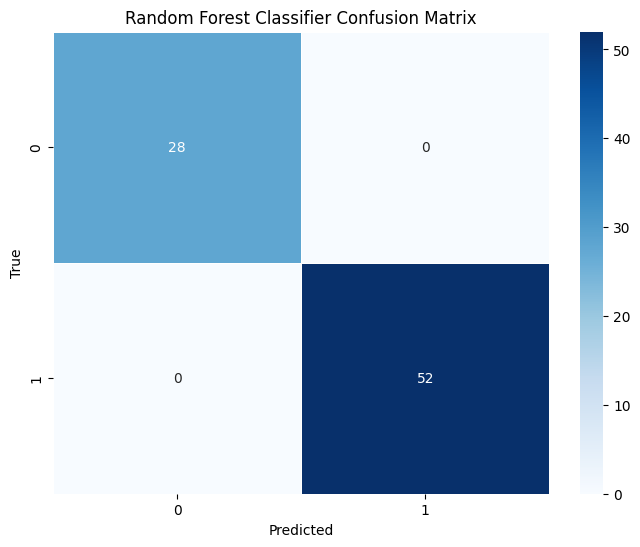

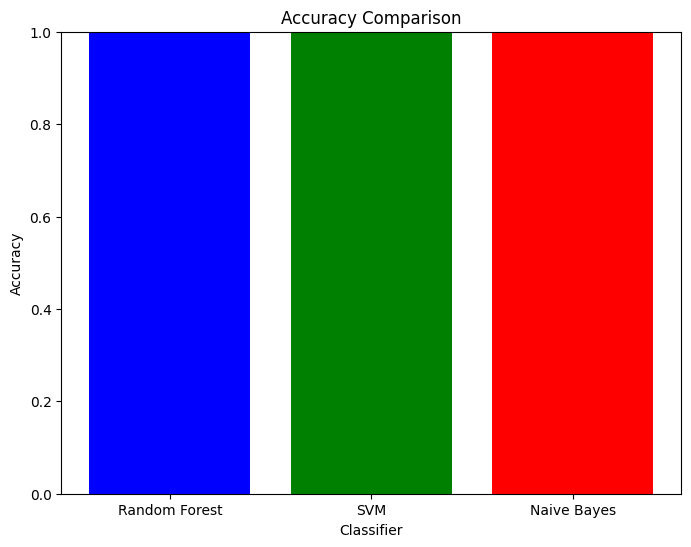

In [15]:
# Confusion Matrix Heatmap for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

# Bar Chart for Accuracy
classifiers = ["Random Forest", "SVM", "Naive Bayes"]
accuracy_scores = [accuracy_rf, accuracy_svm, accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


#Box-Plot Representation:

This code is used to create a set of box plots for each feature in the dataset to visualize the distribution of feature values for each class label (CKD or No CKD).


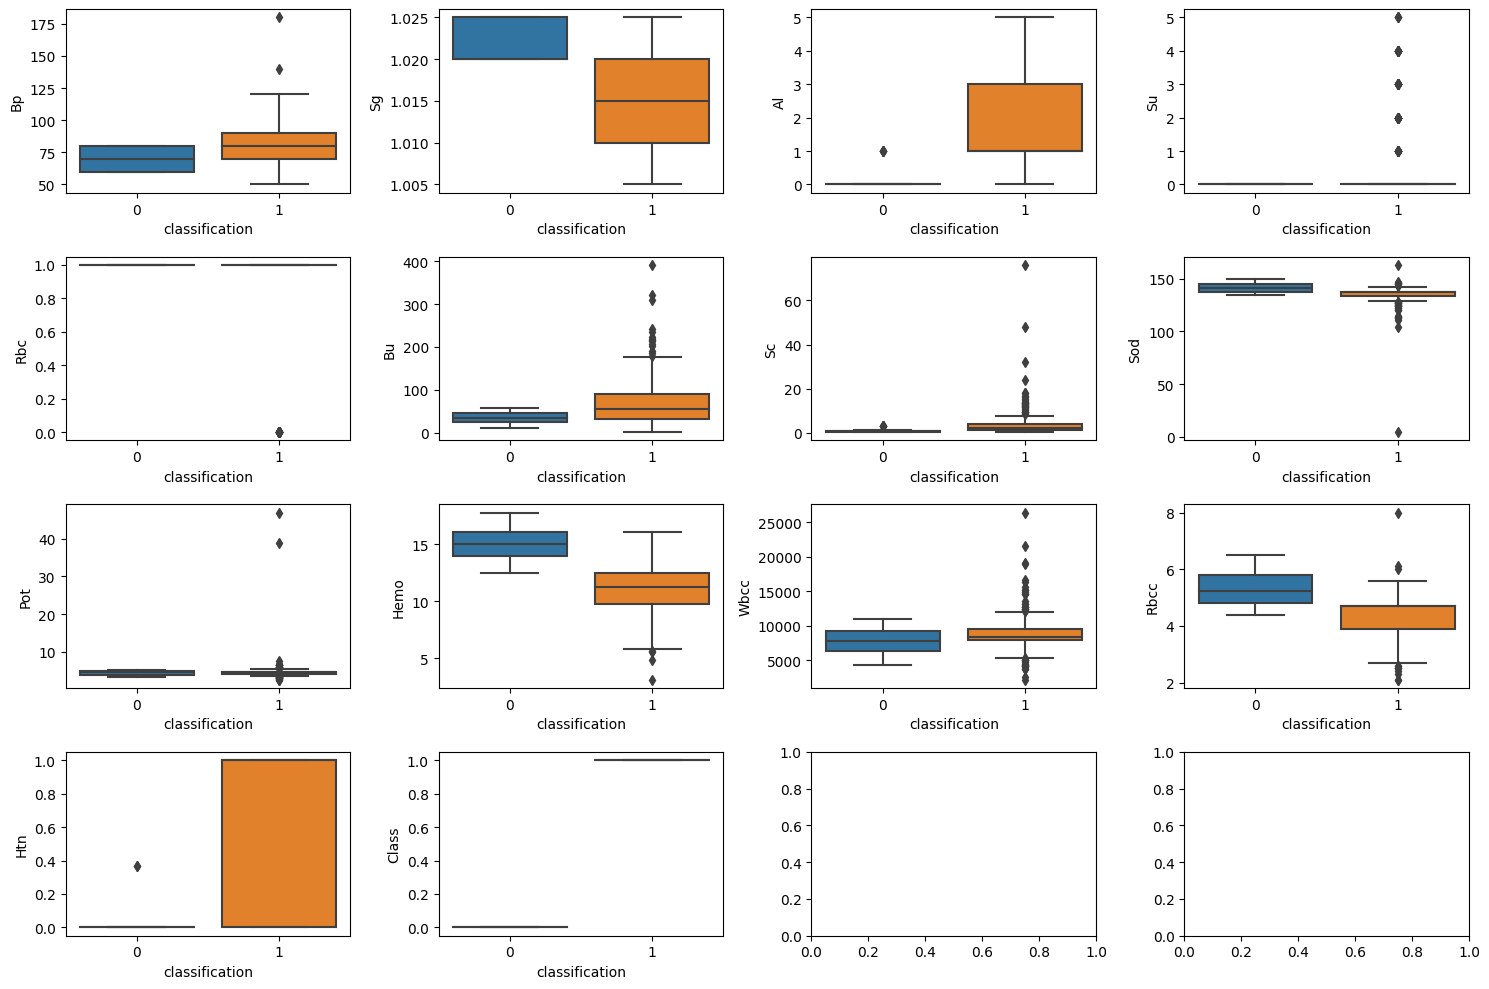

In [16]:
#Box-Plot Representation
n_cols = len(df.columns) - 1
n_rows = (n_cols - 1) // 4 + 1

fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(15,10))

for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x='classification', y=column, data=df, ax=axes[i//4,i%4])

plt.tight_layout()
plt.show()